In [1]:
dataDict = np.load('datainput.npy')[()]

In [2]:
qp.printDictKeys(dataDict)

dict_keys(['kinCube', 'potCube', 'dipCUBE', 'geoCUBE', 'phis', 'gams', 'thes'])


In [3]:
dataDict['kinCube'].shape, dataDict['potCube'].shape, dataDict['dipCUBE'].shape, dataDict['geoCUBE'].shape

((19, 20, 47, 9, 3),
 (19, 20, 47, 14),
 (19, 20, 47, 3, 14, 14),
 (19, 20, 47, 15, 3))

In [4]:
gsm_phi_ind = dataDict['phis'].index('P000-000')
gsm_gam_ind = dataDict['gams'].index('P016-211')
gsm_the_ind = dataDict['thes'].index('P114-719')

In [5]:
gsm_phi_ind, gsm_gam_ind, gsm_the_ind

(8, 13, 6)

In [6]:
from quantumpropagator import labTranformA

phis = labTranformA(dataDict['phis'])
gams = labTranformA(dataDict['gams'])
thes = labTranformA(dataDict['thes'])

In [7]:
dphi = phis[0] - phis[1]
dgam = gams[0] - gams[1]
dthe = thes[0] - thes[1]

In [8]:
from quantumpropagator import calc_g_G



In [9]:
gams

array([  8.   ,   8.632,   9.263,   9.895,  10.526,  11.158,  11.789,
        12.421,  13.053,  13.684,  14.316,  14.947,  15.579,  16.211,
        16.842,  17.474,  18.105,  18.737,  19.368,  20.   ])

In [10]:
thes

array([ 120.112,  119.213,  118.315,  117.416,  116.517,  115.618,
        114.719,  113.82 ,  112.921,  112.022,  111.124,  110.225,
        109.326,  108.427,  107.528,  106.629,  105.73 ,  104.831,
        103.933,  103.034,  102.135,  101.236,  100.337,   99.438,
         98.539,   97.64 ,   96.742,   95.843,   94.944,   94.045,
         93.146,   92.247,   91.348,   90.449,   89.551,   88.652,
         87.753,   86.854,   85.955,   85.056,   84.157,   83.258,
         82.36 ,   81.461,   80.562,   79.663,   78.764])

In [11]:
dataDict['potCube'] = dataDict['potCube'][gsm_phi_ind,:,:]
dataDict['kinCube'] = dataDict['kinCube'][gsm_phi_ind,:,:]

In [12]:
dataDict['potCube'].shape, dataDict['kinCube'].shape,

((20, 47, 14), (20, 47, 9, 3))

In [13]:
#dataDict['potCube'] = dataDict['potCube'][:,0:20,:]
#dataDict['kinCube'] = dataDict['kinCube'][:,0:20,:]

In [14]:
dataDict['potCube'].shape, dataDict['kinCube'].shape, 

((20, 47, 14), (20, 47, 9, 3))

In [22]:
   %matplotlib notebook
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from ipywidgets import interact#, interactive, fixed, interact_manual
import ipywidgets as widgets

def do3dplot(xs,ys,zss):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    X,Y = np.meshgrid(xs, ys)
    #ax.plot_wireframe(X, Y, zss)
    ax.scatter(X, Y, zss)
    
def do3dplot2(X,Y,Z):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    #ax.plot_wireframe(X, Y, Z)
    ax.scatter(X, Y, Z)
    
def kinElem(mkelem,deriv):
    expl = '{}\'th order derivative coefficient in K matrix'.format(deriv)
    tis = ['Tpp','Tpg','Tpt','Tgp','Tgg','Tgt','Ttp','Ttg','Ttt']
    tisexpl = '{} -> '.format(tis[mkelem])
    print(tisexpl + expl)
    x = thes
    y = gams
    z = dataDict['kinCube'][:,:,mkelem,deriv]
    do3dplot(x,y,z)

## K matrix elements

In [24]:
interact(kinElem, mkelem = widgets.IntSlider(min=0,max=8,step=1,value=0), deriv = widgets.IntSlider(min=0,max=2,step=1,value=0));

interactive(children=(IntSlider(value=0, description='mkelem', max=8), IntSlider(value=0, description='deriv',…

In [25]:
def doubleArrayZ(array):
    Y = array
    N = len(Y)
    X = np.arange(0, 2*N, 2)
    X_new = np.arange(2*N-1)       # Where you want to interpolate
    Y_new = np.interp(X_new, X, Y) 
    return(Y_new)

<IPython.core.display.Javascript object>


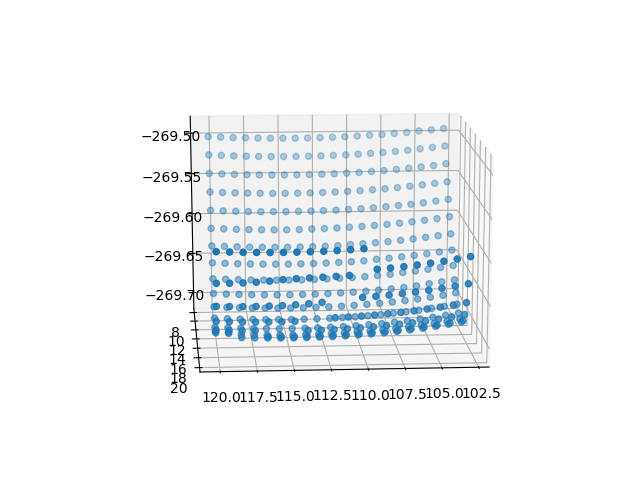

In [26]:
from scipy.interpolate import Rbf

ground_state = dataDict['potCube'][:,:20,0]

ground_state.shape
allgams,allthes = np.meshgrid(gams, thes[:20])
rbf = Rbf(allgams, allthes, ground_state, epsilon=3)
XI, YI = np.meshgrid(doubleArrayZ(doubleArrayZ(gams)),doubleArrayZ(doubleArrayZ(thes[:20])))
ZI = rbf(XI, YI)

do3dplot(thes[:20],gams,ground_state)

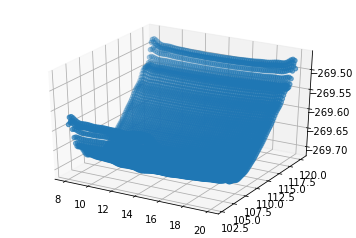

In [19]:
do3dplot2(XI, YI, ZI)

In [20]:
(ZI.size,ground_state.size)

(5929, 400)